# Recap of some fundamentals

## Variable assignment

* Names in Python are what most languages refer to as variables, or variable names
* To save the value of an object for later use a name can be assigned to it
* The assignment operator is `=`
* Assignment is to bind a name to an object

In [1]:
a = 2

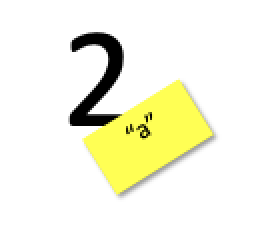

### Variables in functions: scope

Consider the function definition

In [ ]:
a = 2

def square(x):
    x2 = a * x * x
    return x2

* The cell defines two objects, a number (name `a`, type `int`) and a function (name `square`)

* The lines in the function are not executed here, we only define what will happen when we execute (call) the function.

In [ ]:
result = square(8)
result

What about the other variables? We can print the value of `a`

In [ ]:
print(a)

How about x2? You would get a `NameError`

In [ ]:
#print(x2)

~~~
print(x2)
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[15], line 1
----> 1 print(x2)

NameError: name 'x2' is not defined
~~~


* `a` has global scope (can be used anywhere inside the notebook)
* `x2` has local scope (definitions inside a function are not available outside the function)

when we call square(8) what happes is roughly

*  square(8)
    *  x = 8
    *  x2 = 2 * 8 * 8 = 128
    *  return 128
    *  local names x, x2 are deleted
*  result = 128

Call by value or reference?

* In computer languages data are input to a function either by value (copied data) or by reference.
* In Python it is essentially call by reference (some prefere to say call by assignment).
* This is particularly important with input that can change (mutable).

Example


In [1]:
def add_atom(molecule, atom):
    molecule.append(atom)
    print('molecule:', molecule)

atoms = []
add_atom(atoms, 'H')
add_atom(atoms, 'O')
print('atoms:', atoms)

molecule: ['H']
molecule: ['H', 'O']
atoms: ['H', 'O']


* Call-by-reference means that changes to an object inside a function (here `molecule`) that has been passed as an input argument to the function (`atoms`) will be permanent.
* Inside the function `molecule` and `atoms` are two references to the same object.

### Variables in loops

We have implicit variable assignment in a for loop. Consider the following situation where we have some degree of repetition

In [ ]:
print(1 * 7)
print(2 * 7)
print(3 * 7)

As we see a pattern here where one thing varies (1, 2, 3) and the rest is the same, this is a candidate for a loop.

* The loop variable takes on the changing parts
* The rest can be generalized to the body of the for loop.

Explicitly we can write this as

In [ ]:
i = 1
print(i * 7)
i = 2
print(i * 7)
i = 3
print(i * 7)

the parts that look the same (print) becomes the body of the loop

In [ ]:
for i in [1, 2, 3]:
    print(i * 7)

The loop implicitly involves an assignment to the loop variable, which takes on the values in the sequence one at a time

## modules and import
When we have written code to be reused by others (including you) it may be saved in a plain-text file with the extension `.py`. This will become a Python module that we can import in other code.

Let us first save the cell with the function to a text file

In [ ]:
%%file "mymodule.py"
a = 2

def square(x):
    x2 = a * x * x
    return x2

Now we have something we can import. During an import two things happen:

* all code in the file is executed
* the global names defined in the file will be available in a so called module namespace

In [ ]:
import mymodule
print(mymodule.a)
print(mymodule.square(8))

An elaboration of the `square` function above is

In [ ]:
%%file "mymodule1.py"
import sys

a = 2

def square(x):
    x2 = a * x * x
    return x2

if __name__ == "__main__":  # skip this during import
    if len(sys.argv) > 1:
        n = int(sys.argv[1])
        print(square(n))
    else:
        print(f"Usage: {sys.argv[0]} <number>")


This demonstrates a common pattern in python files that are both used as independent programs

In [ ]:
!python mymodule1.py 8

and as modules for others to import

In [ ]:
import mymodule1
print(mymodule1.square(8))

What makes this possible? The builtin variable `__name__` has different values in the two cases

In [ ]:
%%file "name_main_demo.py"
print('__name__:', __name__)

In [ ]:
!python name_main_demo.py
import name_main_demo

## Classes example

A second elaboration is to write the same in a context of a class

In [ ]:
%%file mymodule2.py
import sys

class MyMath:
    # a = 2 # class variable
    def __init__(self, a):
        self.a = a   # instance variable

    def square(self, x):
        x2 = self.a * x * x
        return x2

if __name__ == "__main__":  # skip this during import
    if len(sys.argv) > 1:
        n = int(sys.argv[1])
        my_math = MyMath()
        
        print(my_math.square(n))
        print(MyMath.square(my_math, n))
    else:
        print(f"Usage: {sys.argv[0]} <number>")


In this example we have changed a to be an instance variable of the class. Its value is set during initialization of a new object, and will generally be differnt for differnent objects

In [ ]:
import mymodule2

In [ ]:
mm1 = mymodule2.MyMath(1)

print(mm1.square(8))
print(mm1.a)

In [ ]:
mm2 = mymodule2.MyMath(2)

print(mm2.square(8))
print(mm2.a)

### Variable assignment in a class method call

During assigmnent in a class method call the following assignments are implied:

~~~
* mm2.square(8)
    * self = mm2
    * x = 8
    * x2 = 2 * 8 * 8
    * return 128
~~~
